# Analysis of Mancala simulations

In [20]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
filepath = '../data/all_simulations.csv'
data = pd.read_csv(filepath)
data.describe()

,player_1_score,player_2_score,player_1_moves,player_2_moves,total_moves,n_start_marbles,n_cups,first_move
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.0,250000.0,250000.000000
mean,26.284656,21.715344,53.146928,43.451508,96.598436,4.0,6.0,3.486100
std,6.794640,6.794640,13.874382,14.368743,14.867880,0.0,0.0,1.720122
min,7.000000,4.000000,6.000000,4.000000,26.000000,4.0,6.0,1.000000
25%,21.000000,16.000000,43.000000,33.000000,86.000000,4.0,6.0,2.000000
50%,27.000000,21.000000,53.000000,43.000000,96.000000,4.0,6.0,4.000000
75%,32.000000,27.000000,62.000000,54.000000,107.000000,4.0,6.0,5.000000
max,44.000000,41.000000,104.000000,101.000000,155.000000,4.0,6.0,6.000000


## Random-Random strategy, distribution of scores/moves

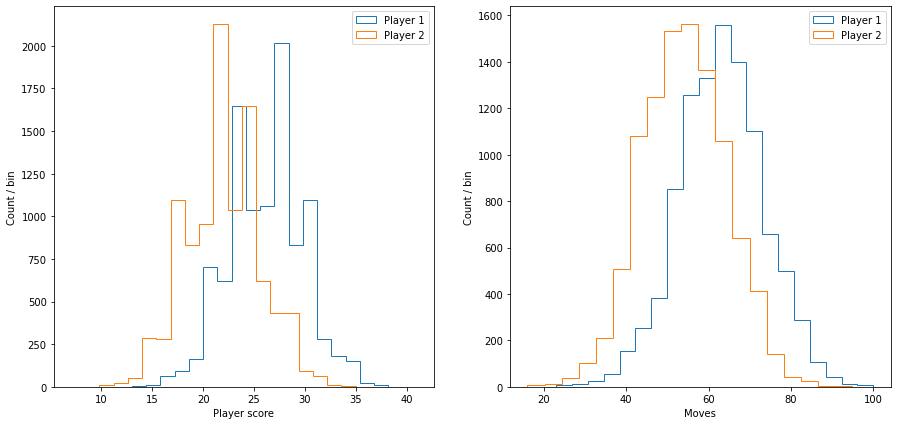

In [22]:
view = data[ (data['player_one_strategy'] == 'random') & (data['player_two_strategy'] == 'random') ]
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].hist(view['player_1_score'], label='Player 1', bins=20, histtype='step')
ax[0].hist(view['player_2_score'], label='Player 2', bins=20, histtype='step')
ax[0].set_xlabel('Player score')
ax[0].set_ylabel('Count / bin')
ax[0].legend()

ax[1].hist(view['player_1_moves'], bins=20, histtype='step', label='Player 1')
ax[1].hist(view['player_2_moves'], bins=20, histtype='step', label='Player 2')
ax[1].set_xlabel('Moves')
ax[1].set_ylabel('Count / bin')
ax[1].legend()

plt.show()

## Random-Random strategy: no. of moves for each game outcome

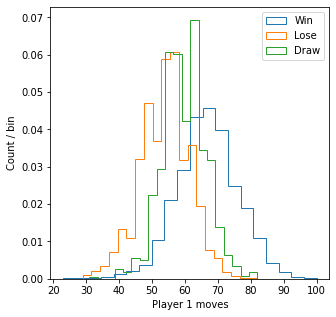

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.hist(view[view['player_1_result'] == 'win']['player_1_moves'],  label='Win',  bins=20, histtype='step', density=True)
ax.hist(view[view['player_1_result'] == 'lose']['player_1_moves'], label='Lose', bins=20, histtype='step', density=True)
ax.hist(view[view['player_1_result'] == 'draw']['player_1_moves'], label='Draw', bins=20, histtype='step', density=True)

ax.set_xlabel('Player 1 moves')
ax.set_ylabel('Count / bin')
ax.legend()

plt.show()

## win rate vs first move

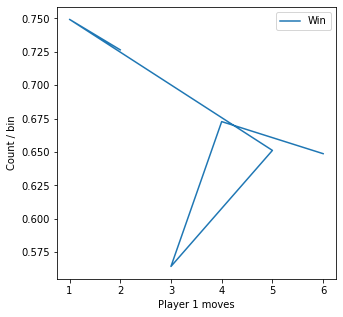

In [39]:
initial_moves = view['first_move'].unique()
win_probs  = pd.DataFrame(columns=['prob'], index=initial_moves, dtype=float)
lose_probs = pd.DataFrame(columns=['prob'], index=initial_moves, dtype=float)
draw_probs = pd.DataFrame(columns=['prob'], index=initial_moves, dtype=float)

for move in initial_moves:
    first_move_view = view[ view['first_move'] == move ]
    norm = len(first_move_view)
    
    win_probs['prob'].loc[move]  = len(first_move_view[ first_move_view['player_1_result'] == 'win' ]) / norm
    lose_probs['prob'].loc[move] = len(first_move_view[ first_move_view['player_1_result'] == 'lose' ]) / norm
    draw_probs['prob'].loc[move] = len(first_move_view[ first_move_view['player_1_result'] == 'draw' ]) / norm
    
    
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(win_probs,  label='Win')
#ax.hist(view[view['player_1_result'] == 'lose']['player_1_moves'], label='Lose', bins=20, histtype='step', density=True)
#ax.hist(view[view['player_1_result'] == 'draw']['player_1_moves'], label='Draw', bins=20, histtype='step', density=True)

ax.set_xlabel('Player 1 moves')
ax.set_ylabel('Count / bin')
ax.legend()

plt.show()